In [184]:
from env import FrozenLake
import numpy as np
from time import time
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
#TRANSLATES ACTIONS FROM NUMBERS INTO WORDS
def get_actions(policy):
    reverse_action = {0:'LEFT',1:'DOWN',2:'RIGHT',3:'UP'}
    for i,action in enumerate(np.argmax(policy,axis=1)):
        print(i,reverse_action[action])

In [186]:
#PLOTS THE Q VALUES INTO A SPREAD SHEET FORMAT
def plot_Q(Q):

    fig, ax = plt.subplots(figsize=(10,11))

    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')

    df = pd.DataFrame(np.round(Q,4), columns=['Left','Down','Right','Up'])
    # df['State'] = np.arange(len(Q))
    
    table= ax.table(cellText=df.values,cellLoc='center',rowLabels=np.arange(len(Q)), colLabels=df.columns, loc='center')
    table.scale(1, 2)
    table.set_fontsize(12)
    fig.tight_layout()

    plt.show()

# Part One:

In [187]:
# Create The Environment
environment = FrozenLake(810100352,gamma=0.9,theta=0.1,slip_prob=0.04,size=(6,6),mode=1)

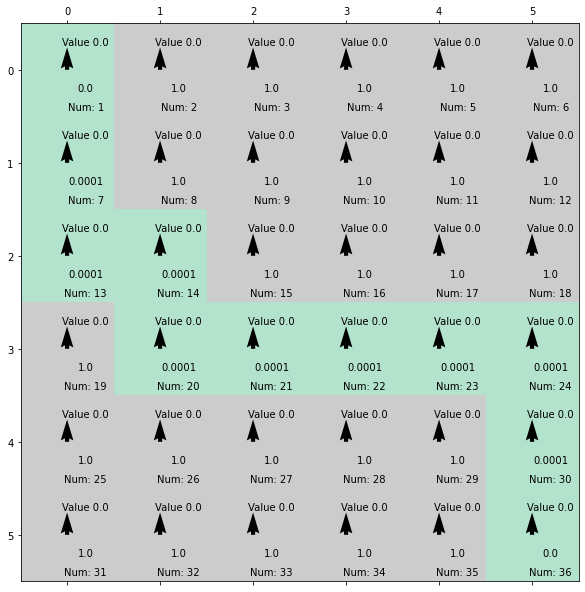

In [188]:
environment.render()

Policy Iteration

In [189]:
tic = time()
iteration = 0
while True:
    iteration+=1
    #POLICY EVALUATION
    while True:
        delta=0
        #LOOP OVER ALL STATES
        for s in environment.states:
            #SAVE OLD VALUE FOR COMPUTING DELTA
            v_old = environment.V[s]
            #COMPUTE DISCOUNTED RETURN FOR EACH ACTION STATE
            G = (environment.discount_factor * environment.V + environment.R[s])
            #COMPUTE Q FOR EACH ACTION STATE
            environment.Q[s] = np.sum(environment.T[s] * G ,axis=1)
            #BASED ON THE SELECTED ACTION (ACTION WITH BIGGEST Q) SELECT OTHER 3 ACTIONS WITH EQUAL PROBABLITY
            slippery_action = np.full(4,fill_value=0.33)
            slippery_action[np.argmax(environment.policy[s])] = 0
            #CALCULATE AN EXPECTED VALUE BASED ON ACTUAL POLICY AND A RANDOM ACTION
            environment.V[s] = (1-environment.slip_prob) * np.sum(environment.Q[s]*environment.policy[s]) \
            + (environment.slip_prob) * np.sum(environment.Q[s] * slippery_action)
            #COMPUTE DELTA VALUE
            delta = max(delta,np.abs(v_old - environment.V[s]))
        #IF DELTA IS SMALLER THAN THETA END POLICY EVALUATION
        if delta < environment.theta:
            break
    #POLICY IMPROVEMENT
    policy_stable = True
    #LOOP OVER ALL STATES
    for s in environment.states:
        #SAVE THE OLD POLICY
        old_policy = np.copy(environment.policy[s])
        #CHANGE THE OLD POLICY TO THE ACTION WHITH BIGGEST Q VALUE
        environment.policy[s] = 0
        environment.policy[s][np.argmax(environment.Q[s])] = 1
        #IF THE POLICY IS CHANGED FOR THE STATE SET THE STABLE FLAG TO FALSE
        if np.allclose(old_policy,environment.policy[s])==False:
            policy_stable = False
    #IF POLICY IS STABLE END THE POLICY IMPROVEMENT
    if policy_stable:
        break
tac= time()
print(f'Policy Iteration Ended in {iteration} Iteration and {tac - tic} seconds')

Policy Iteration Ended in 7 Iteration and 0.18254876136779785 seconds


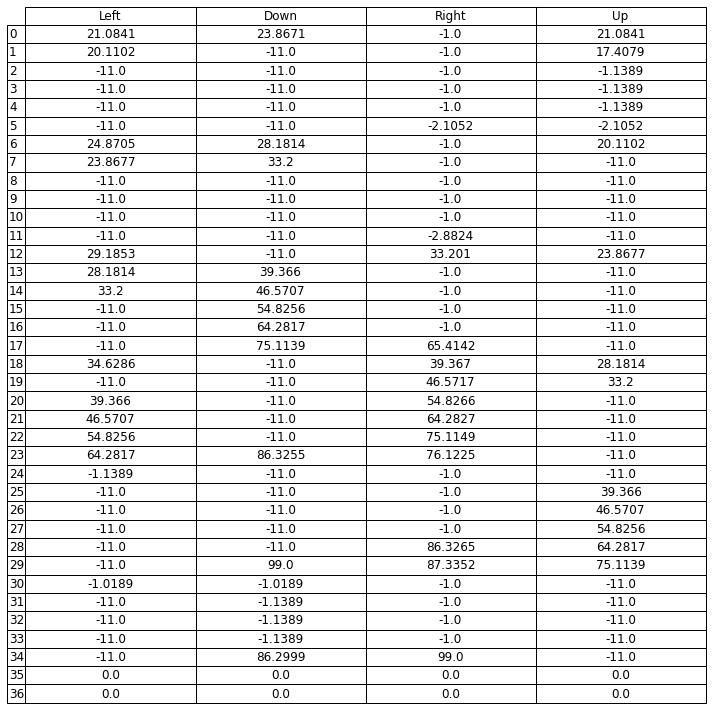

In [190]:
plot_Q(environment.Q)

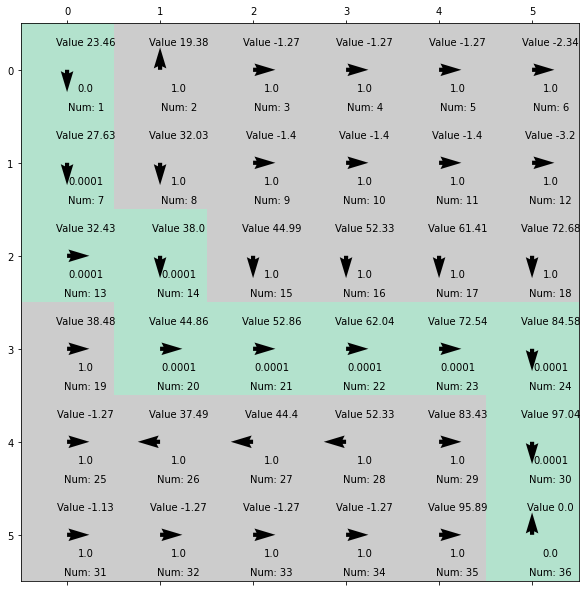

In [191]:
environment.render()

Value Iteration

In [192]:
#RESET THE VARIABLES
environment.reset()
tic = time()
iteration=0
while True:
    delta=0
    iteration+=1
    #LOOP OVER ALL STATES
    for s in environment.states:
        #SAVE THE OLD VALUE FOR CALCULATING DELTA
        v_old = environment.V[s]
        #CALCULATE THE DISCOUNTED RETURN
        G = (environment.discount_factor * environment.V + environment.R[s])
        #CALCULATE THE Q FOR ALL ACTIONS
        environment.Q[s] = np.sum(environment.T[s] * G ,axis=1)
        #BASED ON THE SELECTED ACTION (ACTION WITH BIGGEST Q) SELECT OTHER 3 ACTIONS WITH EQUAL PROBABLITY
        slippery_action = np.full(4,fill_value=0.33)
        slippery_action[np.argmax(environment.policy[s])] = 0
        #CALCULATE AN EXPECTED VALUE BASED ON ACTUAL VALUE AND VALUE IN CASE OF SLIPPING
        environment.V[s] = (1-environment.slip_prob) * np.max(environment.Q[s]) \
        + (environment.slip_prob) * np.sum(environment.Q[s] * slippery_action)
        #CALCULTATE DELTA VALUE
        delta = max(delta,np.abs(v_old - environment.V[s]))
    #IF DELTA IS SMALLER THAN THETA END THE WHILE LOOP
    if delta < environment.theta:
        break
#LOOP OVER ALL STATES FOR IMPROVEMENT
for s in environment.states:
    #CHANGE THE POLICY TO THE ACTION WITH BIGGEST Q
    environment.policy[s] = 0
    environment.policy[s][np.argmax(environment.Q[s])] = 1
tac = time()
print(f'Value Iteration Ended in {iteration} Iteration and {tac - tic} seconds')

Value Iteration Ended in 13 Iteration and 0.04197049140930176 seconds


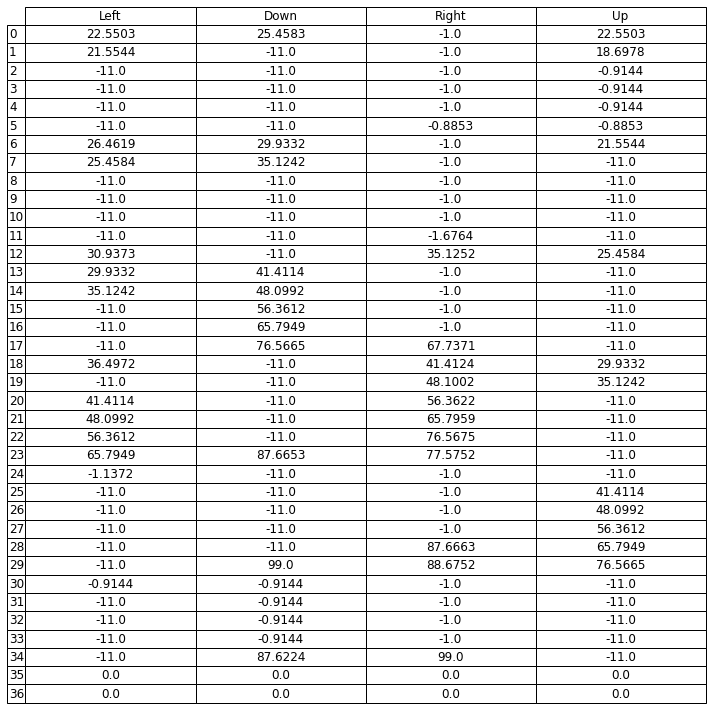

In [193]:
plot_Q(environment.Q)

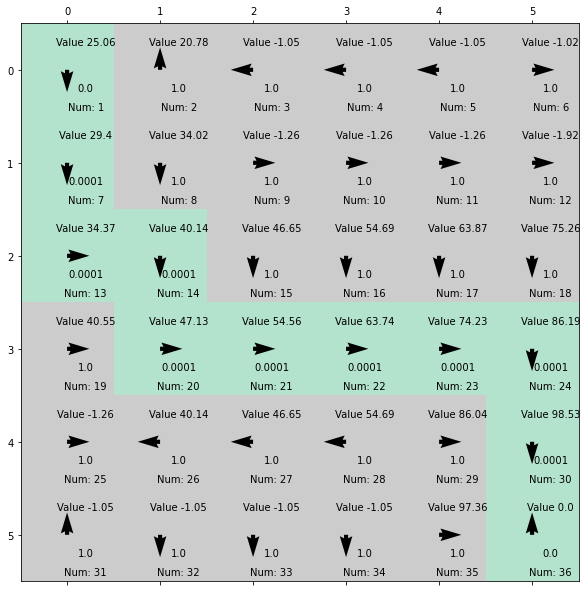

In [194]:
environment.render()

# PART TWO

In [195]:
# Create The Environment
environment = FrozenLake(810100352,gamma=0.9,theta=0.1,slip_prob=0.30,size=(6,6),mode=2)

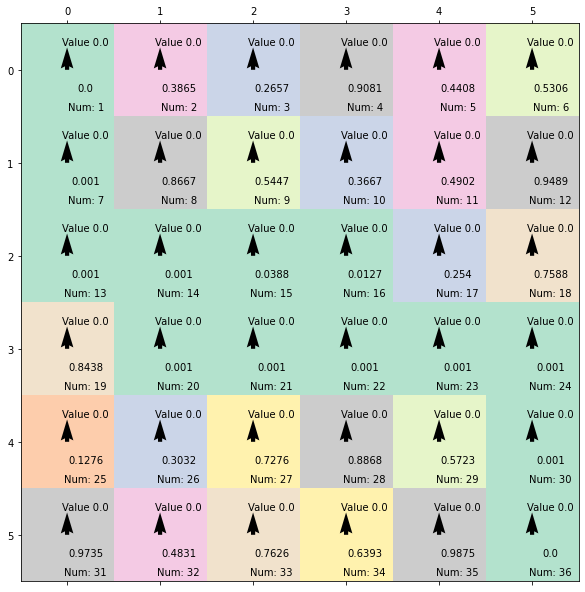

In [196]:
environment.render()

Policy Iteration

In [197]:
tic = time()
iteration = 0
environment.reset()
while True:
    iteration+=1
    #POLICY EVALUATION
    while True:
        delta=0
        #LOOP OVER ALL STATES
        for s in environment.states:
            #SAVE OLD VALUE FOR COMPUTING DELTA
            v_old = environment.V[s]
            #COMPUTE DISCOUNTED RETURN FOR EACH ACTION STATE
            G = (environment.discount_factor * environment.V + environment.R[s])
            #COMPUTE Q FOR EACH ACTION STATE
            environment.Q[s] = np.sum(environment.T[s] * G ,axis=1)
            #BASED ON THE SELECTED ACTION (ACTION WITH BIGGEST Q) SELECT OTHER 3 ACTIONS WITH EQUAL PROBABLITY
            slippery_action = np.full(4,fill_value=0.33)
            slippery_action[np.argmax(environment.policy[s])] = 0
            #CALCULATE AN EXPECTED VALUE BASED ON ACTUAL POLICY AND A RANDOM ACTION IN CASE AGENT SLIP
            environment.V[s] = (1-environment.slip_prob) * np.sum(environment.Q[s]*environment.policy[s]) \
            + (environment.slip_prob) * np.sum(environment.Q[s] * slippery_action)
            #COMPUTE DELTA VALUE
            delta = max(delta,np.abs(v_old - environment.V[s]))
        #IF DELTA IS SMALLER THAN THETA END POLICY EVALUATION
        if delta < environment.theta:
            break
    #POLICY IMPROVEMENT
    policy_stable = True
    #LOOP OVER ALL STATES
    for s in environment.states:
        #SAVE THE OLD POLICY
        old_policy = np.copy(environment.policy[s])
        #CHANGE THE OLD POLICY TO THE ACTION WHITH BIGGEST Q VALUE
        environment.policy[s] = 0
        environment.policy[s][np.argmax(environment.Q[s])] = 1
        #IF THE POLICY IS CHANGED FOR THE STATE SET THE STABLE FLAG TO FALSE
        if np.allclose(old_policy,environment.policy[s])==False:
            policy_stable = False
    #IF POLICY IS STABLE END THE POLICY IMPROVEMENT
    if policy_stable:
        break
tac= time()
print(f'Policy Iteration Ended in {iteration} Iteration and {tac - tic} seconds')

Policy Iteration Ended in 6 Iteration and 0.14655065536499023 seconds


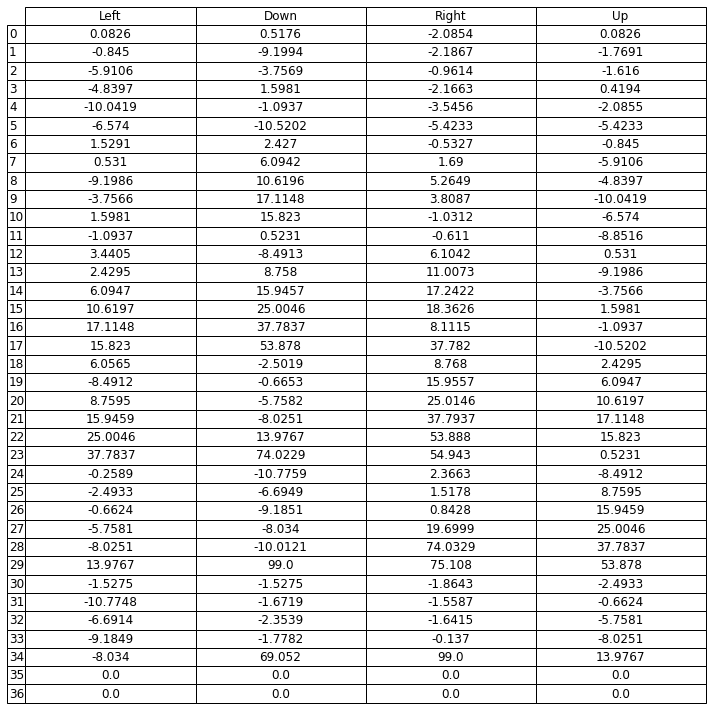

In [198]:
plot_Q(environment.Q)

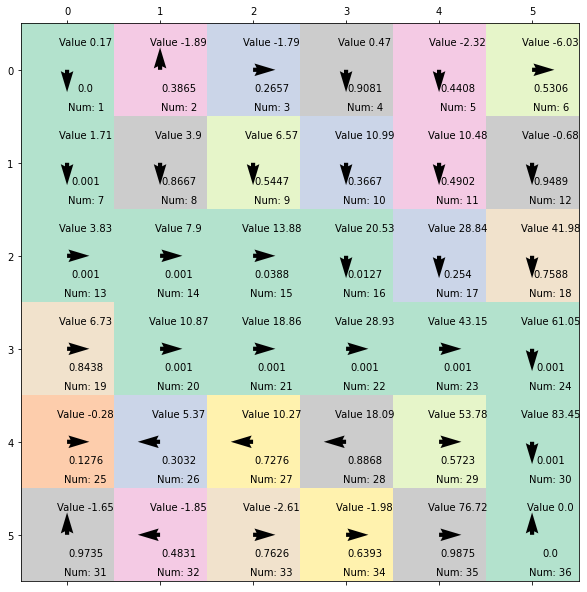

In [199]:
environment.render()

Value Iteration

In [200]:
#RESET THE VARIABLES
environment.reset()
tic = time()
iteration=0
while True:
    delta=0
    iteration+=1
    #LOOP OVER ALL STATES
    for s in environment.states:
        #SAVE THE OLD VALUE FOR CALCULATING DELTA
        v_old = environment.V[s]
        #CALCULATE THE DISCOUNTED RETURN
        G = (environment.discount_factor * environment.V + environment.R[s])
        #CALCULATE THE Q FOR ALL ACTIONS
        environment.Q[s] = np.sum(environment.T[s] * G ,axis=1)
        #BASED ON THE SELECTED ACTION (ACTION WITH BIGGEST Q) SELECT OTHER 3 ACTIONS WITH EQUAL PROBABLITY
        slippery_action = np.full(4,fill_value=0.33)
        slippery_action[np.argmax(environment.policy[s])] = 0
        #CALCULATE AN EXPECTED VALUE BASED ON ACTUAL VALUE AND VALUE IN CASE OF SLIPPING
        environment.V[s] = (1-environment.slip_prob) * np.max(environment.Q[s]) \
        + (environment.slip_prob) * np.sum(environment.Q[s] * slippery_action)
        #CALCULTATE DELTA VALUE
        delta = max(delta,np.abs(v_old - environment.V[s]))
    #IF DELTA IS SMALLER THAN THETA END THE WHILE LOOP
    if delta < environment.theta:
        break
#LOOP OVER ALL STATES FOR IMPROVEMENT
for s in environment.states:
    #CHANGE THE POLICY TO THE ACTION WITH BIGGEST Q
    environment.policy[s] = 0
    environment.policy[s][np.argmax(environment.Q[s])] = 1
tac = time()
print(f'Value Iteration Ended in {iteration} Iteration and {tac - tic} seconds')

Value Iteration Ended in 15 Iteration and 0.04993414878845215 seconds


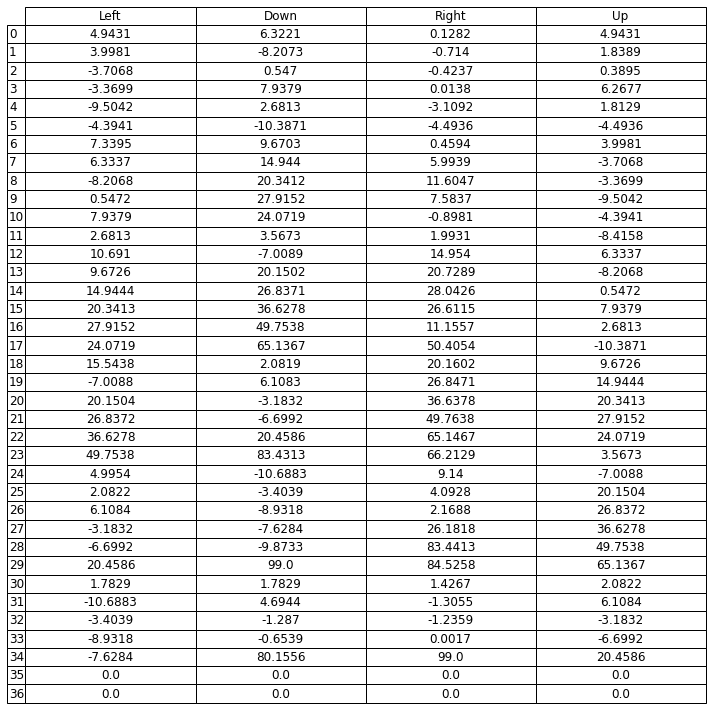

In [201]:
plot_Q(environment.Q)

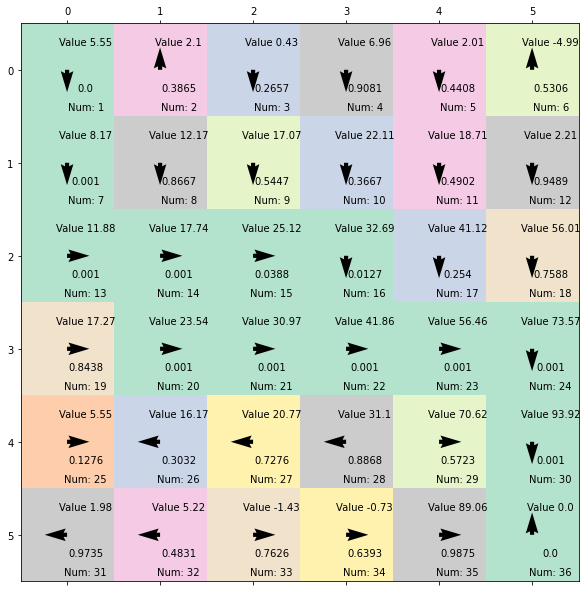

In [202]:
environment.render()

# PART THREE - a

In [237]:
def render(environment,dir):
    nrows, ncols = environment.obs.shape
    values = environment.V[:-1].reshape(nrows,ncols)
    fig = plt.figure(figsize=(20,20))
    idx=0
    plt.matshow(environment.obs,fignum=1,cmap='Pastel2')
    actions = {0:[0,1],1:[0,-1],2:[1,0],3:[-1,0]}
    for i in range(nrows):
        for j in range(ncols):
            val = round(values[i,j],2)
            arrow= actions[np.argmax(environment.policy[idx])]
            break_prob = np.round(environment.obs[i,j],4)
            
            # print(idx,val,np.argmax(policy[idx]),arrow)
            
            plt.text(y=i-0.3,x=j+0.2,s=f'Value {val}',va='center',ha='center',)
            plt.text(y=i+0.2,x=j+0.2,s=break_prob,va='center',ha='center')
            plt.text(y=i+0.4,x=j+0.2,s=f'Num: {idx+1}',va='center',ha='center',)
            plt.quiver(j,i,arrow[0],arrow[1],scale=50)
            idx += 1
    plt.savefig(dir)
    plt.close(fig)

In [229]:
# Create The Environment
environment = FrozenLake(810100352,gamma=0.9,theta=1,slip_prob=0.30,size=(15,15),mode=2)

In [238]:
render(environment,'./init.png')

In [243]:
policies = []
values = []
Q_values=[]
for t in [1,0.9,0.5,0.1,0.01,0.001,0.0001,0.00001,0.000001]:
    environment.reset()
    environment.theta = t
    tic = time()
    iteration = 0
    while True:
        iteration+=1
        #POLICY EVALUATION
        while True:
            delta=0
            #LOOP OVER ALL STATES
            for s in environment.states:
                #SAVE OLD VALUE FOR COMPUTING DELTA
                v_old = environment.V[s]
                #COMPUTE DISCOUNTED RETURN FOR EACH ACTION STATE
                G = (environment.discount_factor * environment.V + environment.R[s])
                #COMPUTE Q FOR EACH ACTION STATE
                environment.Q[s] = np.sum(environment.T[s] * G ,axis=1)
                #BASED ON THE SELECTED ACTION (ACTION WITH BIGGEST Q) SELECT OTHER 3 ACTIONS WITH EQUAL PROBABLITY
                slippery_action = np.full(4,fill_value=0.33)
                slippery_action[np.argmax(environment.policy[s])] = 0
                #CALCULATE AN EXPECTED VALUE BASED ON ACTUAL POLICY AND A RANDOM ACTION IN CASE AGENT SLIP
                environment.V[s] = (1-environment.slip_prob) * np.sum(environment.Q[s]*environment.policy[s]) \
                + (environment.slip_prob) * np.sum(environment.Q[s] * slippery_action)
                #COMPUTE DELTA VALUE
                delta = max(delta,np.abs(v_old - environment.V[s]))
            #IF DELTA IS SMALLER THAN THETA END POLICY EVALUATION
            if delta < environment.theta:
                break
        #POLICY IMPROVEMENT
        policy_stable = True
        #LOOP OVER ALL STATES
        for s in environment.states:
            #SAVE THE OLD POLICY
            old_policy = np.copy(environment.policy[s])
            #CHANGE THE OLD POLICY TO THE ACTION WHITH BIGGEST Q VALUE
            environment.policy[s] = 0
            environment.policy[s][np.argmax(environment.Q[s])] = 1
            #IF THE POLICY IS CHANGED FOR THE STATE SET THE STABLE FLAG TO FALSE
            if np.allclose(old_policy,environment.policy[s])==False:
                policy_stable = False
        #IF POLICY IS STABLE END THE POLICY IMPROVEMENT
        if policy_stable:
            break
    tac= time()
    print(f'Policy Iteration with Theta: {t} Ended in {iteration} Iteration, Execution Time: {tac - tic} seconds')
    policies.append(environment.policy)
    values.append(environment.V)
    Q_values.append(environment.Q)
    render(environment,dir=f'./PI_{t}.png')

Policy Iteration with Theta: 1 Ended in 6 Iteration, Execution Time: 0.570237398147583 seconds
Policy Iteration with Theta: 0.9 Ended in 6 Iteration, Execution Time: 0.5707640647888184 seconds
Policy Iteration with Theta: 0.5 Ended in 6 Iteration, Execution Time: 0.6169507503509521 seconds
Policy Iteration with Theta: 0.1 Ended in 6 Iteration, Execution Time: 0.7863478660583496 seconds
Policy Iteration with Theta: 0.01 Ended in 6 Iteration, Execution Time: 1.0789358615875244 seconds
Policy Iteration with Theta: 0.001 Ended in 6 Iteration, Execution Time: 1.5484392642974854 seconds
Policy Iteration with Theta: 0.0001 Ended in 6 Iteration, Execution Time: 2.07039475440979 seconds
Policy Iteration with Theta: 1e-05 Ended in 6 Iteration, Execution Time: 2.6084964275360107 seconds
Policy Iteration with Theta: 1e-06 Ended in 6 Iteration, Execution Time: 3.150268793106079 seconds


In [244]:
policies=[]
values=[]
Q_values=[]
for t in [1,0.9,0.5,0.1,0.01,0.001,0.0001,0.00001,0.000001]:
    environment.theta = t
    #RESET THE VARIABLES
    environment.reset()
    tic = time()
    iteration=0
    while True:
        delta=0
        iteration+=1
        #LOOP OVER ALL STATES
        for s in environment.states:
            #SAVE THE OLD VALUE FOR CALCULATING DELTA
            v_old = environment.V[s]
            #CALCULATE THE DISCOUNTED RETURN
            G = (environment.discount_factor * environment.V + environment.R[s])
            #CALCULATE THE Q FOR ALL ACTIONS
            environment.Q[s] = np.sum(environment.T[s] * G ,axis=1)
            #BASED ON THE SELECTED ACTION (ACTION WITH BIGGEST Q) SELECT OTHER 3 ACTIONS WITH EQUAL PROBABLITY
            slippery_action = np.full(4,fill_value=0.33)
            slippery_action[np.argmax(environment.policy[s])] = 0
        #CALCULATE AN EXPECTED VALUE BASED ON ACTUAL VALUE AND VALUE IN CASE OF SLIPPING
            environment.V[s] = (1-environment.slip_prob) * np.max(environment.Q[s]) \
            + (environment.slip_prob) * np.sum(environment.Q[s] * slippery_action)
            #CALCULTATE DELTA VALUE
            delta = max(delta,np.abs(v_old - environment.V[s]))
        #IF DELTA IS SMALLER THAN THETA END THE WHILE LOOP
        if delta < environment.theta:
            break
    #LOOP OVER ALL STATES FOR IMPROVEMENT
    for s in environment.states:
        #CHANGE THE POLICY TO THE ACTION WITH BIGGEST Q
        environment.policy[s] = 0
        environment.policy[s][np.argmax(environment.Q[s])] = 1
    tac = time()
    #PRINT TIME AND ITERATION
    print(f'Value Iteration with Theta: {t} Ended in {iteration} Iteration, Execution Time {tac - tic} seconds')
    #SAVE THE P,V,Q ARRAYS
    policies.append(environment.policy)
    values.append(environment.V)
    Q_values.append(environment.Q)
    #CREATE THE PLOT AND SAVE IT IN THE DIR
    render(environment,dir=f'./VI_{t}.png')

Value Iteration with Theta: 1 Ended in 15 Iteration, Execution Time 0.25699353218078613 seconds
Value Iteration with Theta: 0.9 Ended in 15 Iteration, Execution Time 0.24523448944091797 seconds
Value Iteration with Theta: 0.5 Ended in 17 Iteration, Execution Time 0.2819356918334961 seconds
Value Iteration with Theta: 0.1 Ended in 19 Iteration, Execution Time 0.3138890266418457 seconds
Value Iteration with Theta: 0.01 Ended in 25 Iteration, Execution Time 0.40358972549438477 seconds
Value Iteration with Theta: 0.001 Ended in 36 Iteration, Execution Time 0.5884380340576172 seconds
Value Iteration with Theta: 0.0001 Ended in 48 Iteration, Execution Time 0.7752876281738281 seconds
Value Iteration with Theta: 1e-05 Ended in 59 Iteration, Execution Time 0.9504573345184326 seconds
Value Iteration with Theta: 1e-06 Ended in 71 Iteration, Execution Time 1.1388671398162842 seconds


# Part Three - b

In [259]:
#FIRST WE CHANGE THE REWARD FOR GETTING TO GOAL STATE FROM 100 TO 30000
environment.R[environment.n_states - 15 - 2,environment.ACTION['DOWN'],environment.n_states-2]= 29999
environment.R[environment.n_states-3,environment.ACTION['RIGHT'],environment.n_states-2]= 29999

In [260]:
policies = []
values = []
Q_values=[]
for t in [1,0.9,0.5,0.1,0.01,0.001,0.0001,0.00001,0.000001]:
    environment.reset()
    environment.theta = t
    tic = time()
    iteration = 0
    while True:
        iteration+=1
        #POLICY EVALUATION
        while True:
            delta=0
            #LOOP OVER ALL STATES
            for s in environment.states:
                #SAVE OLD VALUE FOR COMPUTING DELTA
                v_old = environment.V[s]
                #COMPUTE DISCOUNTED RETURN FOR EACH ACTION STATE
                G = (environment.discount_factor * environment.V + environment.R[s])
                #COMPUTE Q FOR EACH ACTION STATE
                environment.Q[s] = np.sum(environment.T[s] * G ,axis=1)
                #BASED ON THE SELECTED ACTION (ACTION WITH BIGGEST Q) SELECT OTHER 3 ACTIONS WITH EQUAL PROBABLITY
                slippery_action = np.full(4,fill_value=0.33)
                slippery_action[np.argmax(environment.policy[s])] = 0
                #CALCULATE AN EXPECTED VALUE BASED ON ACTUAL POLICY AND A RANDOM ACTION IN CASE AGENT SLIP
                environment.V[s] = (1-environment.slip_prob) * np.sum(environment.Q[s]*environment.policy[s]) \
                + (environment.slip_prob) * np.sum(environment.Q[s] * slippery_action)
                #COMPUTE DELTA VALUE
                delta = max(delta,np.abs(v_old - environment.V[s]))
            #IF DELTA IS SMALLER THAN THETA END POLICY EVALUATION
            if delta < environment.theta:
                break
        #POLICY IMPROVEMENT
        policy_stable = True
        #LOOP OVER ALL STATES
        for s in environment.states:
            #SAVE THE OLD POLICY
            old_policy = np.copy(environment.policy[s])
            #CHANGE THE OLD POLICY TO THE ACTION WHITH BIGGEST Q VALUE
            environment.policy[s] = 0
            environment.policy[s][np.argmax(environment.Q[s])] = 1
            #IF THE POLICY IS CHANGED FOR THE STATE SET THE STABLE FLAG TO FALSE
            if np.allclose(old_policy,environment.policy[s])==False:
                policy_stable = False
        #IF POLICY IS STABLE END THE POLICY IMPROVEMENT
        if policy_stable:
            break
    tac= time()
    print(f'Policy Iteration with Theta: {t} Ended in {iteration} Iteration, Execution Time: {tac - tic} seconds')
    policies.append(environment.policy)
    values.append(environment.V)
    Q_values.append(environment.Q)
    render(environment,dir=f'./PI_{t}.png')

Policy Iteration with Theta: 1 Ended in 8 Iteration, Execution Time: 1.4654884338378906 seconds
Policy Iteration with Theta: 0.9 Ended in 8 Iteration, Execution Time: 1.4892568588256836 seconds
Policy Iteration with Theta: 0.5 Ended in 8 Iteration, Execution Time: 1.5439872741699219 seconds
Policy Iteration with Theta: 0.1 Ended in 8 Iteration, Execution Time: 1.8686399459838867 seconds
Policy Iteration with Theta: 0.01 Ended in 8 Iteration, Execution Time: 2.385939121246338 seconds
Policy Iteration with Theta: 0.001 Ended in 8 Iteration, Execution Time: 3.0043282508850098 seconds
Policy Iteration with Theta: 0.0001 Ended in 8 Iteration, Execution Time: 3.5531911849975586 seconds
Policy Iteration with Theta: 1e-05 Ended in 8 Iteration, Execution Time: 4.246835231781006 seconds
Policy Iteration with Theta: 1e-06 Ended in 8 Iteration, Execution Time: 4.98121452331543 seconds


In [261]:
policies=[]
values=[]
Q_values=[]
for t in [1,0.9,0.5,0.1,0.01,0.001,0.0001,0.00001,0.000001]:
    environment.theta = t
    #RESET THE VARIABLES
    environment.reset()
    tic = time()
    iteration=0
    while True:
        delta=0
        iteration+=1
        #LOOP OVER ALL STATES
        for s in environment.states:
            #SAVE THE OLD VALUE FOR CALCULATING DELTA
            v_old = environment.V[s]
            #CALCULATE THE DISCOUNTED RETURN
            G = (environment.discount_factor * environment.V + environment.R[s])
            #CALCULATE THE Q FOR ALL ACTIONS
            environment.Q[s] = np.sum(environment.T[s] * G ,axis=1)
            #BASED ON THE SELECTED ACTION (ACTION WITH BIGGEST Q) SELECT OTHER 3 ACTIONS WITH EQUAL PROBABLITY
            slippery_action = np.full(4,fill_value=0.33)
            slippery_action[np.argmax(environment.policy[s])] = 0
        #CALCULATE AN EXPECTED VALUE BASED ON ACTUAL VALUE AND VALUE IN CASE OF SLIPPING
            environment.V[s] = (1-environment.slip_prob) * np.max(environment.Q[s]) \
            + (environment.slip_prob) * np.sum(environment.Q[s] * slippery_action)
            #CALCULTATE DELTA VALUE
            delta = max(delta,np.abs(v_old - environment.V[s]))
        #IF DELTA IS SMALLER THAN THETA END THE WHILE LOOP
        if delta < environment.theta:
            break
    #LOOP OVER ALL STATES FOR IMPROVEMENT
    for s in environment.states:
        #CHANGE THE POLICY TO THE ACTION WITH BIGGEST Q
        environment.policy[s] = 0
        environment.policy[s][np.argmax(environment.Q[s])] = 1
    tac = time()
    #PRINT TIME AND ITERATION
    print(f'Value Iteration with Theta: {t} Ended in {iteration} Iteration, Execution Time {tac - tic} seconds')
    #SAVE THE P,V,Q ARRAYS
    policies.append(environment.policy)
    values.append(environment.V)
    Q_values.append(environment.Q)
    #CREATE THE PLOT AND SAVE IT IN THE DIR
    render(environment,dir=f'./VI_{t}.png')

Value Iteration with Theta: 1 Ended in 35 Iteration, Execution Time 0.57550048828125 seconds
Value Iteration with Theta: 0.9 Ended in 35 Iteration, Execution Time 0.5666062831878662 seconds
Value Iteration with Theta: 0.5 Ended in 36 Iteration, Execution Time 0.5778682231903076 seconds
Value Iteration with Theta: 0.1 Ended in 37 Iteration, Execution Time 0.6003310680389404 seconds
Value Iteration with Theta: 0.01 Ended in 39 Iteration, Execution Time 0.6682252883911133 seconds
Value Iteration with Theta: 0.001 Ended in 41 Iteration, Execution Time 0.6571540832519531 seconds
Value Iteration with Theta: 0.0001 Ended in 48 Iteration, Execution Time 0.7712876796722412 seconds
Value Iteration with Theta: 1e-05 Ended in 59 Iteration, Execution Time 0.9703199863433838 seconds
Value Iteration with Theta: 1e-06 Ended in 71 Iteration, Execution Time 1.1198651790618896 seconds
